# Regressão 

<b>Exemplo nesta página</b>: considera-se o ajuste de uma função linear às observações, usando a função custo soma do quadrado das diferenças. Isto é, dado $\{(\mathbf{x}_i,y_i) \,:\, i =1.\ldots,N\}$, busca-se $\mathbf{w}$ que seja o ponto de mínimo de
$$
J(\mathbf{w}) = \frac{1}{2}\sum_{i=1}^{N} (\mathbf{w}^T\,\mathbf{x}_i - y_i)^2
$$

### Função de custo

- X é um array de $N \times (n+1)$ : $N$ amostras de dimensão $n+1$, com o valor na primeira dimensão igual a 1, e uma amostra por linha
- y é um array de $N \times 1$
- w é um array de $(n+1)\times 1$. 

In [1]:
# Calcula o somatório do quadrado das diferenças entre x_i^Tw e y_i 
def computeCost(X, y, w):
    N = y.size
    J = 0
    for i in range(N):
        J += np.square(X[i, :].dot(w) - y[i])
    J /= (2 * N)
    return (J)

### Gradiente descendente

- X é um array de $N \times (n+1)$ - $N$ amostras de dimensão $n+1$, com o valor na primeira dimensão igual a 1, e uma amostra por linha
- y é um array de $N \times 1$
- w é um array de $(n+1)\times 1$
- alpha é um real (learning rate)
- num_iters é o número de iterações

A cada iteração, para todo $j=0,1,\ldots,n$ calcula-se 
$$
\delta_j = \sum_{i=1}^{N} (\mathbf{w}^T\mathbf{x}_i - y_i) x_{ij}
$$
e
atualiza-se o peso da seguinte forma:
$$
w_{ij} = w_{ij} - \alpha \frac{\delta_j}{N}
$$ 

Este é o batch gradient descent pois a cada iteração todas as $N$ amostras são processadas. Ao final de num_iters, devolve w (o vetor de pesos $\mathbf{w}$) e um histórico dos custos calculados com respeito a X

In [2]:
def gradientDescent(X, y, w, alpha, num_iters):
    N = y.size
    J_history = np.zeros(num_iters)
    temp = np.zeros(w.size)
    numParameters = w.size

    for iter in range(num_iters):
        for j in range(numParameters):
            delta_j = 0
            for i in range(N):
                delta_j += (X[i, :].dot(w) - y[i]) * X[i, j]
            temp[j] = w[j] - alpha * (delta_j / N)
        w = temp
        J_history[iter] = computeCost(X, y, w)

    return (w, J_history)

## Exemplo de aplicação

Vamos usar os mesmos dados usados em <code>practice_basic.ipynb</code>

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

fname = 'data/data1.txt'
data = np.loadtxt(fname, delimiter = ',')
N = data.shape[0]
X = data[:, 0]
y = data[:, 1]

print('Dimensão do array X:', X.shape)
print('Dimensão do array y:', y.shape)

# estender x acrescentando um componente contante 1. x --->  (1,x)
X = np.vstack(zip(np.ones(N), X))

print('Dimensão do array X após extensão:', X.shape)


Dimensão do array X: (11,)
Dimensão do array y: (11,)
Dimensão do array X após extensão: (11, 2)


Os dados de entrada são de dimensão 1. Assim, esse é um exemplo de regressão linear simples. Queremos encontrar $\mathbf{w} = (w_0,w_1)$ que define uma função $f(x) = w_0+w_1\,x$.

Experimente alterar
- o número de iterações num_iters
- o learning rate alpha

Initial cost:  2.8120181818181815
Final cost:  0.0943760207484324
Weight w found by gradient descent: (4.383203, -0.579537)


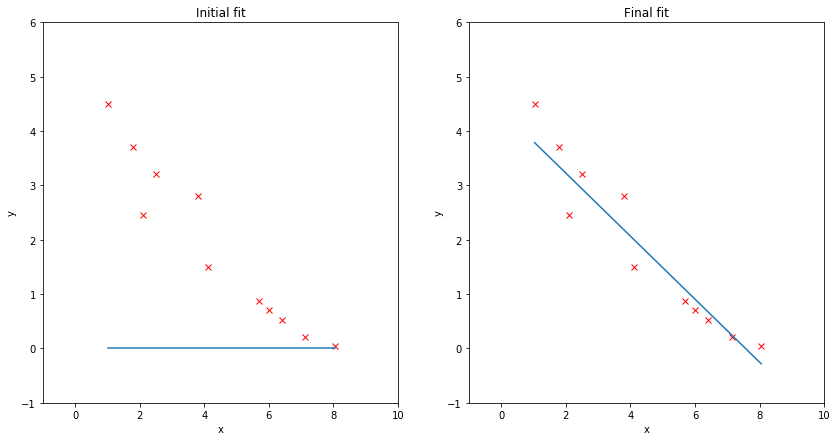

In [5]:
# vetor de pesos começa com zero
w = np.zeros(2)

initialCost = computeCost(X, y, w)
print('Initial cost: ', initialCost)


# plot the initial fit
fig = plt.figure(figsize=(14,7))
plt.subplot(121)
plt.title('Initial fit')
plt.plot(X[:,1], y, 'rx')
plt.plot(X[:,1], X.dot(w), '-')
plt.xlim(-1, 10)
plt.ylim(-1,6)
plt.xlabel('x')
plt.ylabel('y')

# Some gradient descent settings
iterations = 1500
alpha = 0.01

# run gradient descent
w, J_history = gradientDescent(X, y, w, alpha, iterations)


finalCost = computeCost(X, y, w)
print('Final cost: ', finalCost)
print('Weight w found by gradient descent: (%f, %f)' % (w[0], w[1]))


# Plot the final fit
plt.subplot(122)
plt.title('Final fit')
plt.plot(X[:,1], y, 'rx')
plt.plot(X[:,1], X.dot(w), '-')
plt.xlim(-1, 10)
plt.ylim(-1,6)
plt.xlabel('x')
plt.ylabel('y')

plt.show()


Algumas predições usando a função estimada

x = 3.5  predicted output = 2.354825

x = 7.0  predicted output = 0.326447



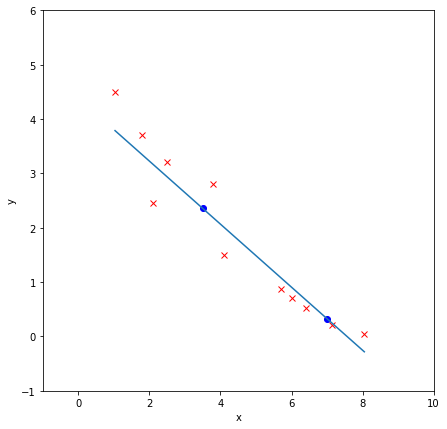

In [6]:
# Predict values for x = 3.5 and x = 7
predict1 = np.dot([1, 3.5], w)
print('x = 3.5  predicted output = %f\n' %(predict1))

predict2 = np.dot([1, 7], w)
print('x = 7.0  predicted output = %f\n' % (predict2))

# Plot the linear fit and predictions
plt.figure(figsize=(7,7))
plt.plot(X[:,1], y, 'rx')
plt.plot([3.5, 7], [predict1, predict2], 'bo')
plt.plot(X[:,1], X.dot(w), '-')
plt.xlim(-1, 10)
plt.ylim(-1,6)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Evolução do custo durante o treinamento

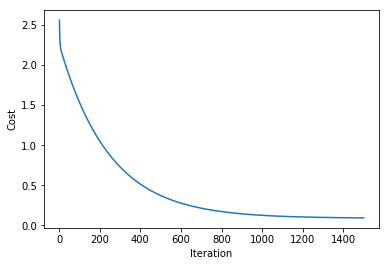

In [7]:
# plot da evolução do custo no treinamento já realizado
#fig = plt.gcf()
#fig.set_size_inches(18.5, 10.5)
#plt.subplot(121)
plt.plot(range(1, J_history.size + 1), J_history, '-')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

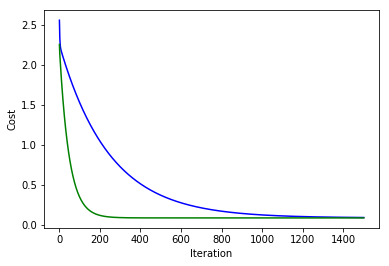

In [8]:
# um segundo treinamento, com valor de alpha distinto
w2 = np.zeros(2)
alpha2 = 0.05
w2, J_history2 = gradientDescent(X, y, w2, alpha2, iterations)

plt.plot(range(1, J_history.size + 1), J_history, 'b-', label="alpha=%d"%alpha)
plt.plot(range(1, J_history2.size + 1), J_history2, 'g-', label="alpha=%d"%alpha2)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

Gráfico da função custo no espaço $\mathbb{R}^2$.
The cost function is computed on a grid of points.

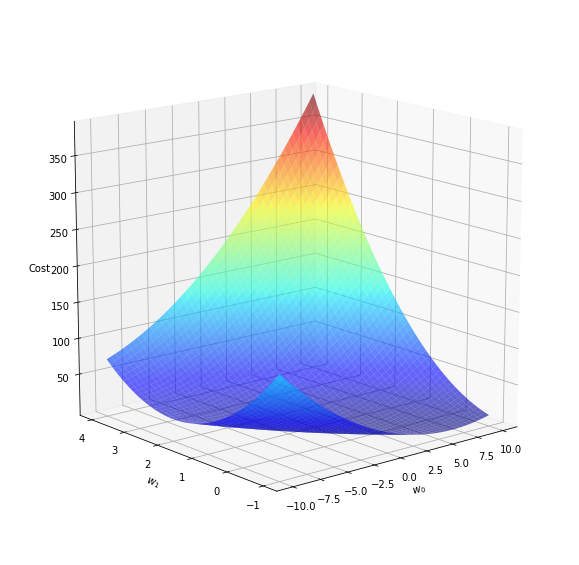

In [9]:
# Grid over which we will calculate J
w0_vals = np.linspace(-10, 10, 50);
w1_vals = np.linspace(-1, 4, 50);

w0_coord, w1_coord = np.meshgrid(w0_vals, w1_vals)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((w0_vals.size, w1_vals.size))

# Fill out J_vals
for i in range(w0_vals.size):
    for j in range(w1_vals.size):
        t = [w0_vals[i], w1_vals[j]]   
        J_vals[i,j] = computeCost(X, y, t)

# Surface plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(w0_coord, w1_coord, J_vals.T, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax.set_xlabel(r'$w_0$')
ax.set_ylabel(r'$w_1$')
ax.set_zlabel('Cost')
ax.view_init(elev=15, azim=230)
plt.show()